# Brazilian E-Commerce Dataset by Olist

* https://www.kaggle.com/olistbr/brazilian-ecommerce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import folium

In [2]:
'''
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv
'''

'\nolist_customers_dataset.csv\nolist_geolocation_dataset.csv\nolist_orders_dataset.csv\nolist_order_items_dataset.csv\nolist_order_payments_dataset.csv\nolist_order_reviews_dataset.csv\nolist_products_dataset.csv\nolist_sellers_dataset.csv\nproduct_category_name_translation.csv\n'

In [3]:
raw_path='data/'
raw_path

'data/'

In [4]:
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
translation=pd.read_csv(raw_path+'product_category_name_translation.csv')

In [5]:
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers]

In [6]:
olist_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


# Data set Over view

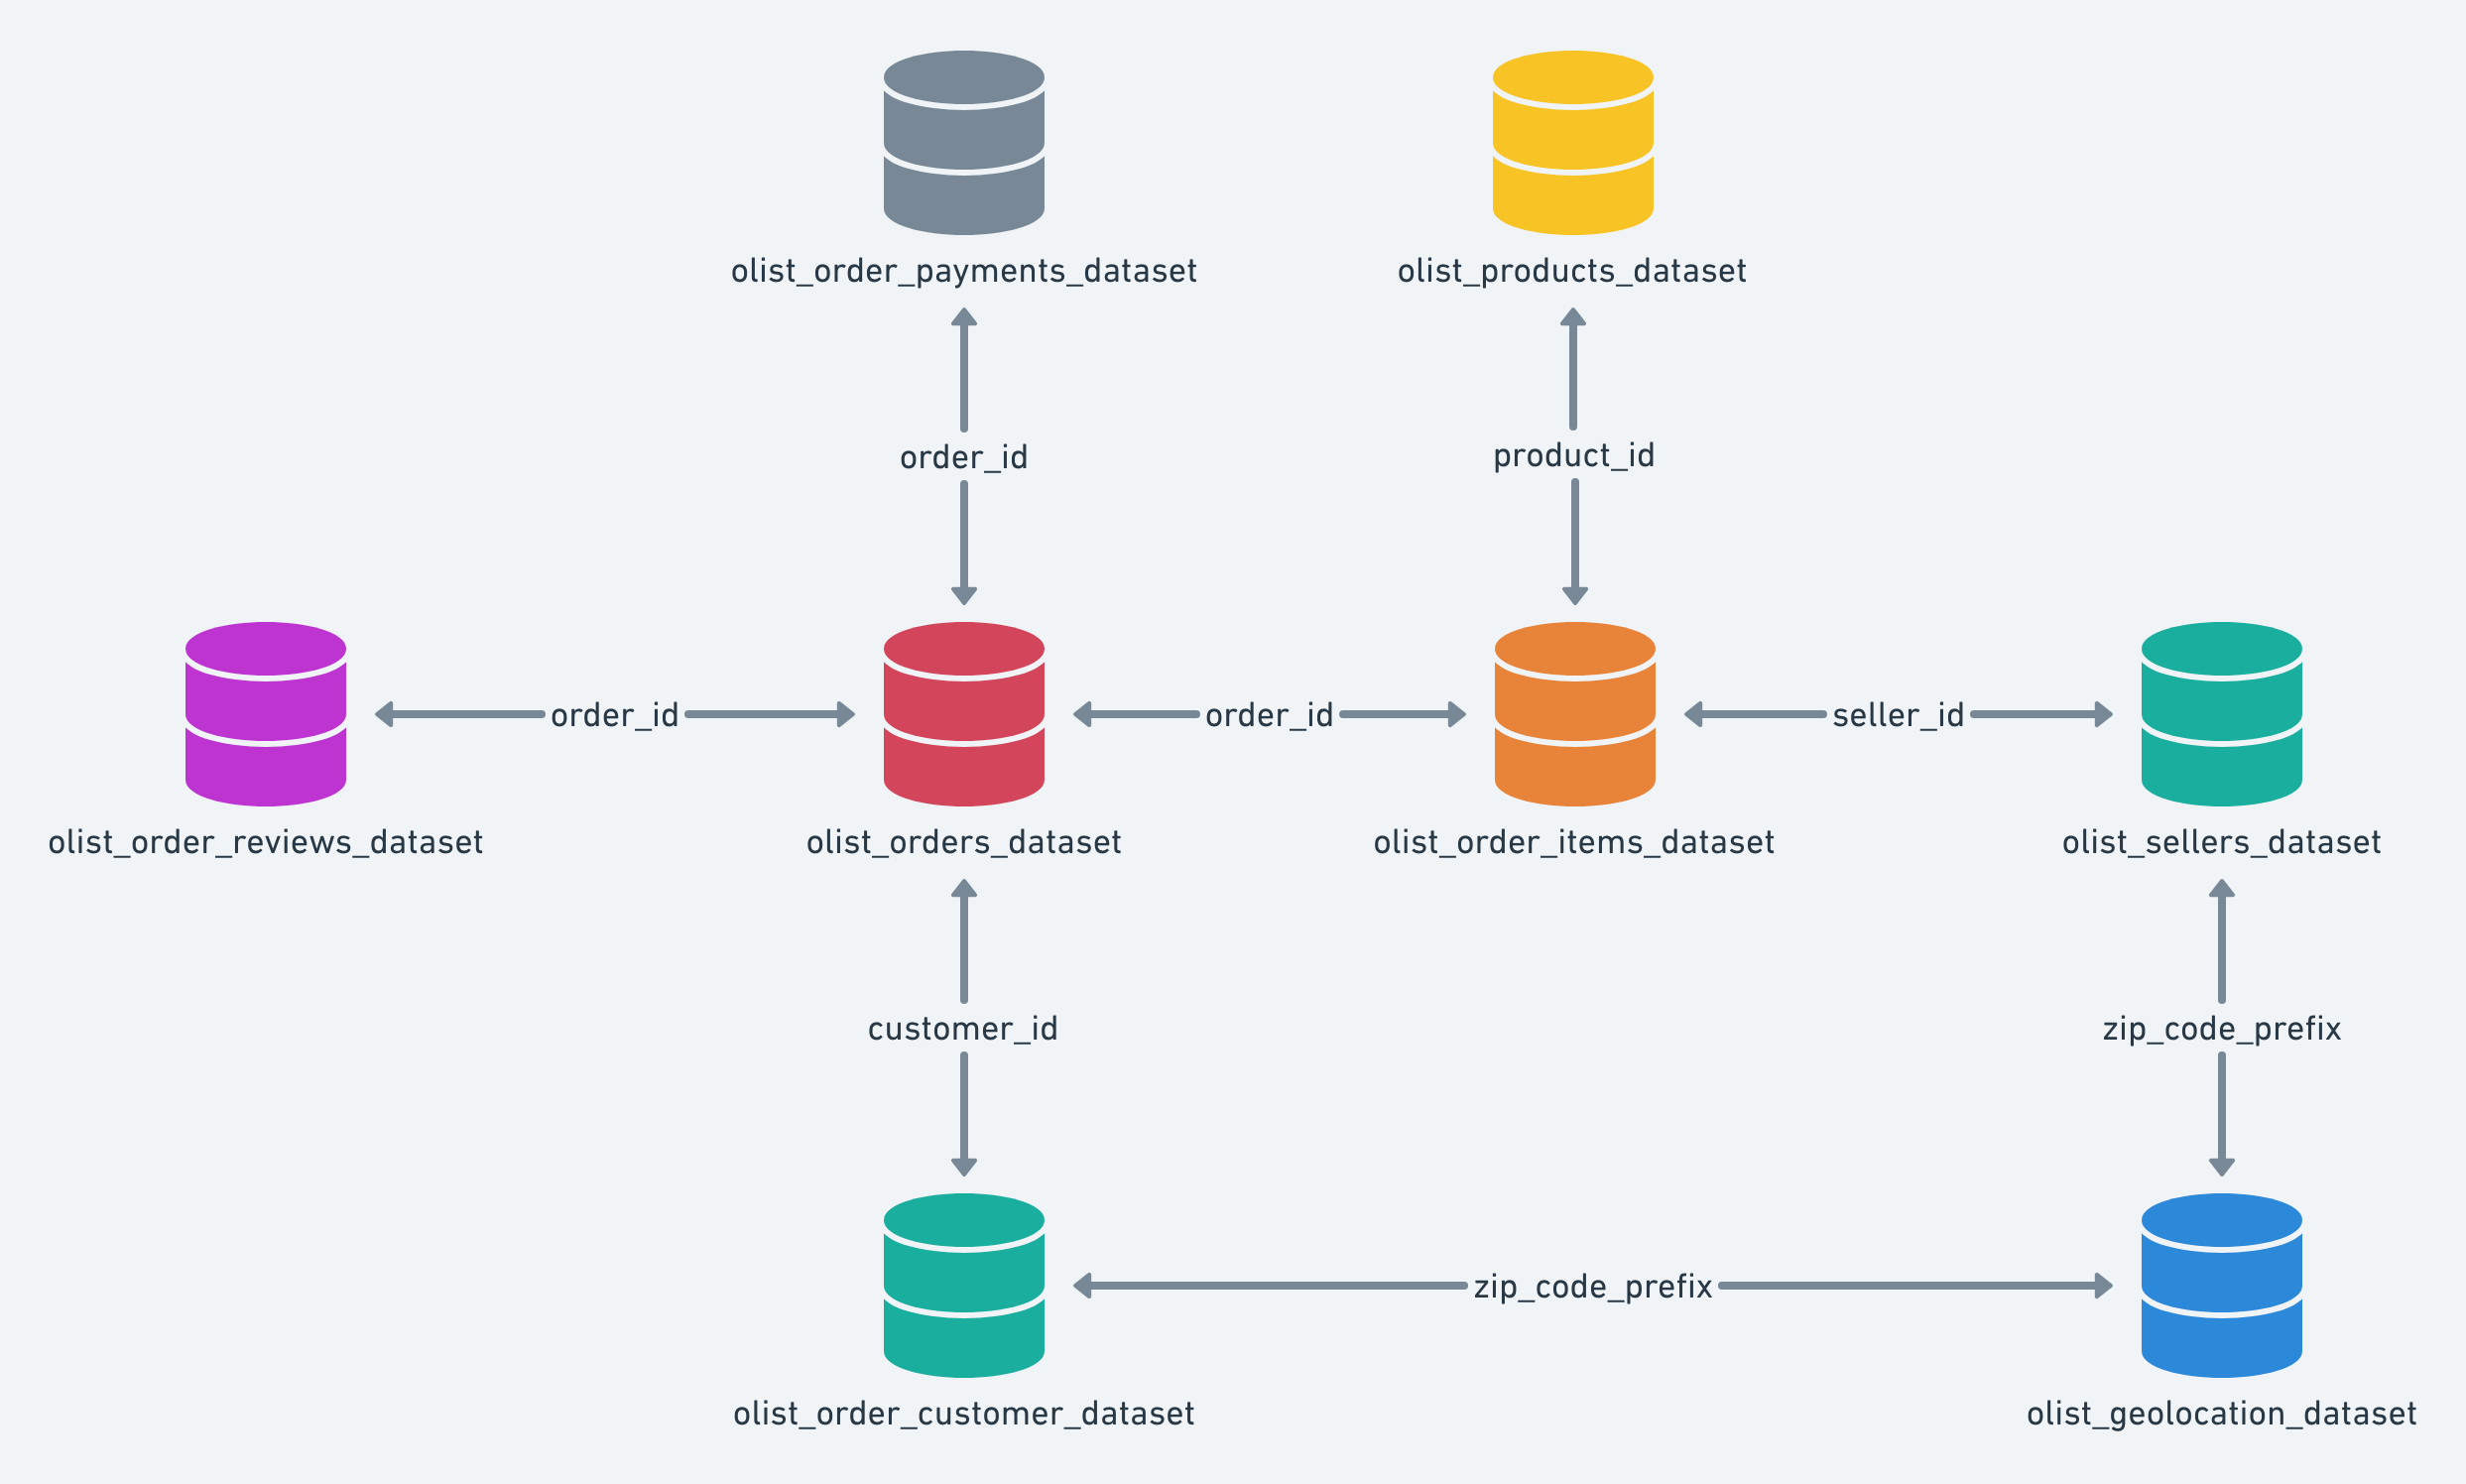

## Order Dataset
This is the core dataset. From each order you might find all other information.

* order_id : unique identifier of the order.
* customer_id : key to the customer dataset. Each order has a unique customer_id.
* order_status : Reference to the order status (delivered, shipped, etc).
* order_purchase_timestamp : Shows the purchase timestamp.
* order_approved_at : Shows the payment approval timestamp.
* order_delivered_carrier_date : Shows the order posting timestamp. When it was handled to the logistic partner.
* order_delivered_customer_date : Shows the actual order delivery date to the customer.
* order_estimated_delivery_date : Shows the estimated delivery date that was informed to customer at the purchase moment.

### info

In [7]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


* **<span style="color:red"> Time형식 변환 필요  </span>**
* **<span style="color:red"> 시간차 파생변수?
</span>**

In [9]:
#Date time 변환
for x in range(3,8):
    olist_orders.iloc[:,x]=pd.to_datetime(olist_orders.iloc[:,x],format='%Y-%m-%d %H:%M:%S')
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [10]:
olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
olist_orders.describe(datetime_is_numeric=True)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776567552,2017-12-31 18:35:24.098819328,2018-01-04 21:49:48.138288384,2018-01-14 12:09:19.035550464,2018-01-24 03:08:37.730113792
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [12]:
olist_orders.describe(include=np.object)

,order_id,customer_id,order_status
count,99441,99441,99441
unique,99441,99441,8
top,99902f632e0a578e6995f6291e0e6cb8,9362ea913384dd5e069a7d24a872a7a7,delivered
freq,1,1,96478


### order_status

In [13]:
olist_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [14]:
olist_orders[olist_orders.order_status=='shipped']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaT,2017-11-24
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24


<AxesSubplot:>

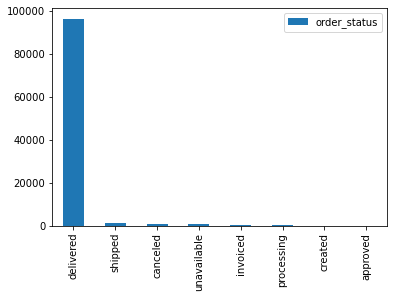

In [15]:
pd.DataFrame(olist_orders.order_status.value_counts()).plot.bar()

### order count_시계열 집계

In [16]:
# 구매 년,월 분리
olist_orders["Year"]=olist_orders.order_purchase_timestamp.dt.year
olist_orders["Month"]=olist_orders.order_purchase_timestamp.dt.month
olist_orders["weekday"]=olist_orders.order_purchase_timestamp.dt.weekday
olist_orders["hour"]=olist_orders.order_purchase_timestamp.dt.hour

In [17]:
def get_month(x):
    if x >= 10:
        return str(x)
    else:
        return '0'+str(x)
M=olist_orders["Month"].apply(lambda x: get_month(x))
M

0        10
1        07
2        08
3        11
4        02
         ..
99436    03
99437    02
99438    08
99439    01
99440    03
Name: Month, Length: 99441, dtype: object

In [18]:
Y=olist_orders["Year"].apply(lambda x: str(x))
olist_orders["Year_Month"]=Y+'-'+M
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,weekday,hour,Year_Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,0,10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,1,20,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2,8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,5,19,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,1,21,2018-02


<AxesSubplot:xlabel='Year_Month'>

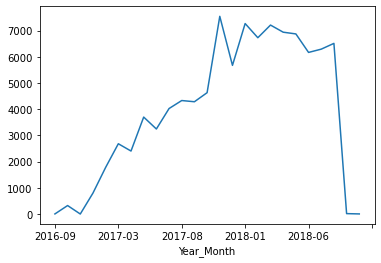

In [19]:
olist_orders.groupby(by=["Year_Month"])["order_id"].count().plot()

In [20]:
ordcnt=olist_orders.pivot_table(index=["Year_Month"], values="order_id", aggfunc=['count'])
ordcnt

,count
,order_id
Year_Month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700


In [21]:
# 이상치 제거 (2016년 9~12, 2018년 9,10월) 
ordcnt_2=ordcnt.iloc[3:-2]
ordcnt_2.columns=['orders']
# 성장률
round(ordcnt_2.pct_change()*100,2)

,orders
Year_Month,
2017-01,NaN
2017-02,122.50
2017-03,50.67
2017-04,-10.37
2017-05,53.91
2017-06,-12.30
2017-07,24.07
2017-08,7.58
2017-09,-1.06


Text(0.5, 1.0, '월별 주문수')

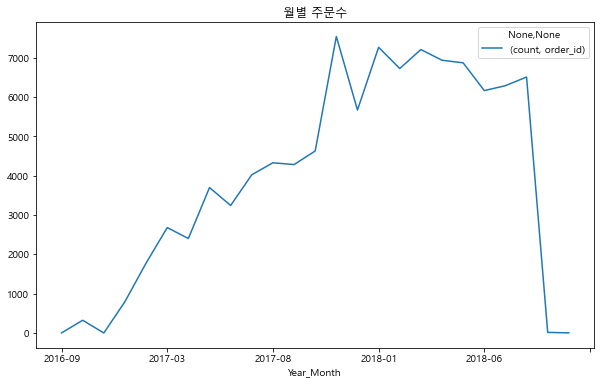

In [22]:
plt.rc("font", family="Malgun Gothic")

ordcnt.plot.line(figsize=(10,6))
plt.title("월별 주문수")

<AxesSubplot:xlabel='Year_Month'>

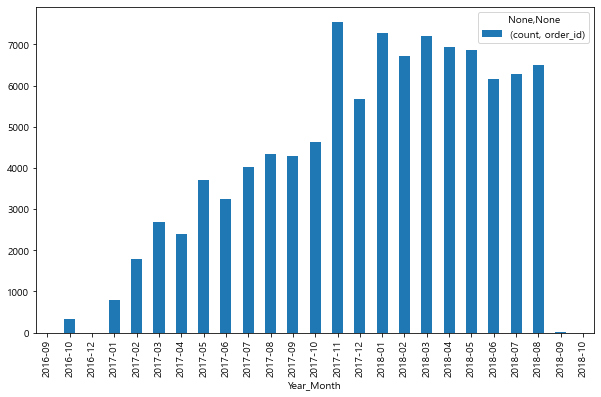

In [23]:
ordcnt.plot.bar(figsize=(10,6))

In [24]:
 # 그룹값은 Seaborn으로 어떻게 시각화할까?

## Payments Dataset
This dataset includes data about the orders payment options.  

* order_id : unique identifier of an order.
* payment_sequential : a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
* payment_type : method of payment chosen by the customer.
* payment_installments : number of installments chosen by the customer.
* payment_value :transaction value.

### info

In [25]:
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
olist_order_payments.describe(include ='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### payment sequence & type 

In [28]:
pd.DataFrame(olist_order_payments.iloc[:,1:4].value_counts())

0
payment_sequential payment_type payment_installments       
1                  credit_card  1                     25352
                   boleto       1                     19783
                   credit_card  2                     12360
                                3                     10422
                                4                      7066
...                                                     ...
                                23                        1
3                  credit_card  3                         1
28                 voucher      1                         1
27                 voucher      1                         1
29                 voucher      1                         1

[69 rows x 1 columns]

In [29]:
pd.DataFrame(olist_order_payments.iloc[:,1].value_counts()).head(7)

,payment_sequential
1,99360
2,3039
3,581
4,278
5,170
6,118
7,82


In [30]:
paymix=pd.DataFrame(olist_order_payments.iloc[:,2].value_counts())
paymix["mix"]=round(paymix.payment_type/sum(paymix.payment_type)*100,2)
paymix

,payment_type,mix
credit_card,76795,73.92
boleto,19784,19.04
voucher,5775,5.56
debit_card,1529,1.47
not_defined,3,0.00


<AxesSubplot:>

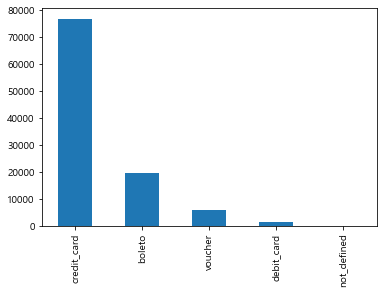

In [31]:
paymix["payment_type"].plot.bar()

<AxesSubplot:ylabel='mix'>

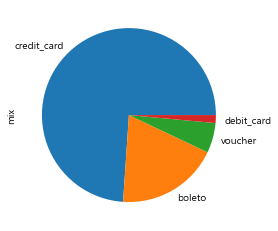

In [32]:
paymix["mix"].plot.pie()

### orderid 별 총 지급액

In [33]:
ordamt=olist_order_payments.groupby('order_id')['payment_value'].sum().to_frame()
ordamt

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


### payment_amont_시계열 집계

#### order에서 필요한 값만 가져오기

In [34]:
ord=olist_orders.iloc[:,[0,1,2,3,8,9,10,11,12]]
ord

,order_id,customer_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017,3,3,9,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018,2,1,12,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017,8,6,14,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018,1,0,21,2018-01


#### ordamt와 merge

In [35]:
ord_pym=pd.merge(ord,ordamt,how='outer',on='order_id')
ord_pym

,order_id,customer_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02,28.62
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017,3,3,9,2017-03,85.08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018,2,1,12,2018-02,195.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017,8,6,14,2017-08,271.01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018,1,0,21,2018-01,441.16


#### Null값 확인

In [36]:
ord_pym.isnull().any()

order_id                    False
customer_id                 False
order_status                False
order_purchase_timestamp    False
Year                        False
Month                       False
weekday                     False
hour                        False
Year_Month                  False
payment_value                True
dtype: bool

In [37]:
ord_pym[ord_pym.payment_value.isnull()] 

,order_id,customer_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016,9,3,12,2016-09,NaN


#### Null값 drop

In [38]:
ord_pym=ord_pym.dropna()
ord_pym.isnull().any()

order_id                    False
customer_id                 False
order_status                False
order_purchase_timestamp    False
Year                        False
Month                       False
weekday                     False
hour                        False
Year_Month                  False
payment_value               False
dtype: bool

#### 월별 pmt value

In [39]:
ord_amt_table=ord_pym.pivot_table(values="payment_value",
                                  index=["Year_Month"],
                                  columns="order_status",
                                  aggfunc="sum",                                  
                                  fill_value=0)
ord_amt_table["Total"]=ord_pym.groupby(["Year_Month"])["payment_value"].sum()
ord_amt_table=ord_amt_table.iloc[3:-2]
ord_amt_table.head()

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable,Total
Year_Month,,,,,,,,,
2017-01,0.00,368.28,0.0,127545.67,3981.55,2515.09,2964.45,1113.00,138488.04
2017-02,61.62,2827.00,0.0,271298.65,1326.80,6671.40,4263.47,5459.07,291908.01
2017-03,0.00,7457.23,0.0,414369.39,802.18,5875.95,4608.88,16749.97,449863.60
2017-04,179.46,7942.02,0.0,390952.18,2223.87,6165.95,6466.92,3857.63,417788.03
2017-05,0.00,4388.86,0.0,567066.73,2548.98,4270.76,9039.69,5603.80,592918.82


#### 월별 pmt count

In [40]:
ord_cnt_table=ord_pym.pivot_table(values="order_id",
                                  index=["Year_Month"],
                                  columns="order_status",
                                  aggfunc="count",                                  
                                  fill_value=0)
ord_cnt_table["Total"]=ord_pym.groupby(["Year_Month"])["payment_value"].count()
ord_cnt_table=ord_cnt_table.iloc[3:-2]
ord_cnt_table.head()

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable,Total
Year_Month,,,,,,,,,
2017-01,0,3,0,750,12,9,16,10,800
2017-02,1,17,0,1653,11,32,21,45,1780
2017-03,0,33,0,2546,3,23,45,32,2682
2017-04,1,18,0,2303,14,10,49,9,2404
2017-05,0,29,0,3546,16,23,55,31,3700


#### 월별 order_amt, cnt시각화

In [41]:
Month_total= ord_pym.pivot_table(index=["Year_Month"],
                    values=["payment_value","order_id"],
                    aggfunc=["sum","count"])
Month_total=Month_total.iloc[3:-2,:-1]
Month_total.columns=["amount","count"]
Month_total

,amount,count
Year_Month,,
2017-01,138488.04,800
2017-02,291908.01,1780
2017-03,449863.60,2682
2017-04,417788.03,2404
2017-05,592918.82,3700
2017-06,511276.38,3245
2017-07,592382.92,4026
2017-08,674396.32,4331
2017-09,727762.45,4285


Text(0.5, 1.0, 'Monthly Order')

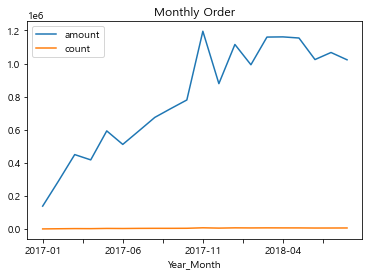

In [42]:
Month_total.plot.line()
plt.title('Monthly Order')

<AxesSubplot:xlabel='Year_Month'>

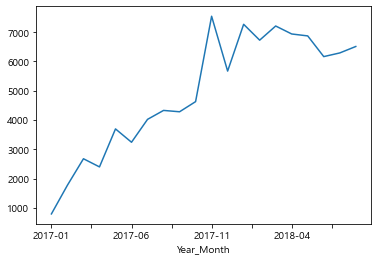

In [43]:
Month_total["count"].plot.line()

<AxesSubplot:label='1bac522b-d19a-4640-a082-dab444f64eee', xlabel='Year_Month', ylabel='count'>

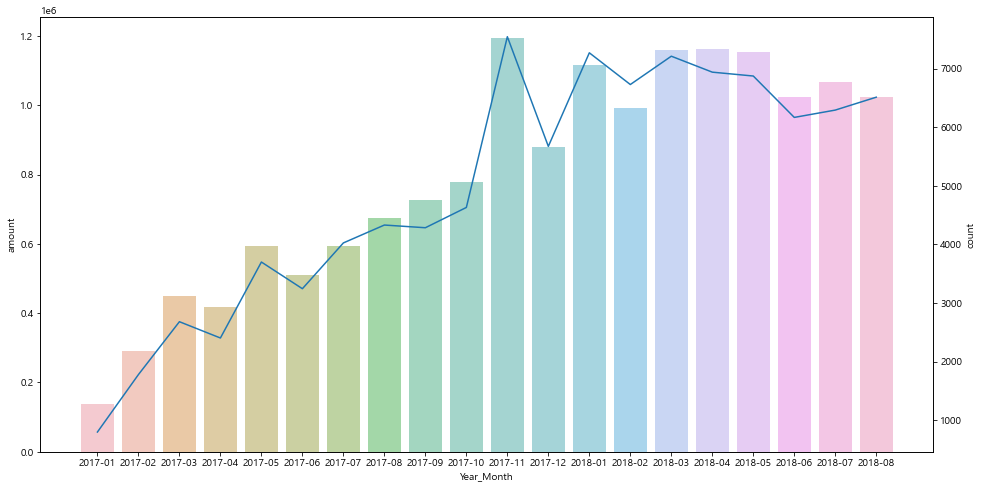

In [44]:
fig, ax1= plt.subplots(figsize=(16,8))
sns.barplot(data=Month_total, x=Month_total.index, y="amount",alpha=0.5, ax= ax1)
ax2=ax1.twinx()
sns.lineplot(data=Month_total["count"], ax=ax2)

### 월별 성장률 , 주문단가 추가 

In [45]:
Month_total["amt_growth"]=Month_total.amount.pct_change()
Month_total["cnt_growth"]=Month_total["count"].pct_change()
Month_total["avg_ord_amt"]=Month_total["amount"]/Month_total["count"]
Month_total

,amount,count,amt_growth,cnt_growth,avg_ord_amt
Year_Month,,,,,
2017-01,138488.04,800,NaN,NaN,173.110050
2017-02,291908.01,1780,1.107821,1.225000,163.993264
2017-03,449863.60,2682,0.541114,0.506742,167.734377
2017-04,417788.03,2404,-0.071301,-0.103654,173.788698
2017-05,592918.82,3700,0.419186,0.539101,160.248330
2017-06,511276.38,3245,-0.137696,-0.122973,157.558206
2017-07,592382.92,4026,0.158635,0.240678,147.139324
2017-08,674396.32,4331,0.138447,0.075758,155.713766
2017-09,727762.45,4285,0.079132,-0.010621,169.839545


<AxesSubplot:xlabel='Year_Month', ylabel='avg_ord_amt'>

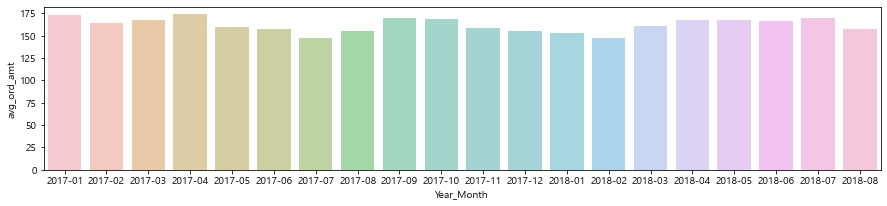

In [46]:
fig, ax=plt.subplots(figsize=(15,3))
sns.barplot(data=Month_total, x=Month_total.index, y="avg_ord_amt",alpha=0.5, ax=ax)

## Order Items Dataset
This dataset includes data about the items purchased within each order.
  
* order_id : order unique identifier
* order_item_id : sequential number identifying number of items included in the same order.
* product_id :product unique identifier
* seller_id :seller unique identifier
* shipping_limit_date :Shows the seller shipping limit date for handling the order over to the logistic partner.
* price :item price
* freight_value :item freight value item (if an order has more than one item the freight value is splitted between items)

### info

In [47]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [48]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [49]:
olist_order_items["order_item_id"]=olist_order_items["order_item_id"].astype(object)
olist_order_items["shipping_limit_date"]=pd.to_datetime(olist_order_items["shipping_limit_date"])
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [50]:
olist_order_items.describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [51]:
olist_order_items.describe(include = np.object)

,order_id,order_item_id,product_id,seller_id
count,112650,112650,112650,112650
unique,98666,21,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,1,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,98666,527,2033


### 제품당 가격정보 갯수 확인 (1개씩 매칭되는지)

In [52]:
#price  count  위해  object 타입으로 변경
p=olist_order_items["price"].apply(lambda x:str(x))
p.describe()

count     112650
unique      5968
top         59.9
freq        2481
Name: price, dtype: object

In [53]:
p2=pd.concat([olist_order_items[["product_id","order_item_id","seller_id"]],p], axis=1)
p2.describe()


,product_id,order_item_id,seller_id,price
count,112650,112650,112650,112650
unique,32951,21,3095,5968
top,aca2eb7d00ea1a7b8ebd4e68314663af,1,6560211a19b47992c3666cc44a7e94c0,59.9
freq,527,98666,2033,2481


In [54]:
p2.groupby('product_id').nunique().sort_values('price', ascending=False)

,order_item_id,seller_id,price
product_id,,,
437c05a395e9e47f9762e677a7068ce7,3,3,31
d285360f29ac7fd97640bf0baef03de0,2,8,29
e0d64dcfaa3b6db5c54ca298ae101d05,2,5,27
6f3b5b605d91b7439c5e3f5a8dffeea7,2,4,23
656e0eca68dcecf6a31b8ececfabe3e8,4,7,23
...,...,...,...
5cf189f48af24c605a16bcdb701df823,1,1,1
5cebe3c91f03e5d52a1951b3ce8354cd,1,1,1
5ceafdc1d838f693f92b8c2d8c3bdc86,1,1,1


In [55]:
#가격개수 31개 제품  example
p2[p2.product_id=='437c05a395e9e47f9762e677a7068ce7']

,product_id,order_item_id,seller_id,price
290,437c05a395e9e47f9762e677a7068ce7,1,bf84056e679dbe9c69929847a40e338f,50.21
687,437c05a395e9e47f9762e677a7068ce7,1,f84fa566034f5e8e880a07ec624c56af,47.65
1143,437c05a395e9e47f9762e677a7068ce7,1,f84fa566034f5e8e880a07ec624c56af,47.65
1602,437c05a395e9e47f9762e677a7068ce7,1,bf84056e679dbe9c69929847a40e338f,59.89
3406,437c05a395e9e47f9762e677a7068ce7,1,f84fa566034f5e8e880a07ec624c56af,49.98
...,...,...,...,...
110249,437c05a395e9e47f9762e677a7068ce7,1,f84fa566034f5e8e880a07ec624c56af,47.65
110357,437c05a395e9e47f9762e677a7068ce7,1,7f7b8245c336066a1f9933c359f11d77,50.75
110856,437c05a395e9e47f9762e677a7068ce7,1,bf84056e679dbe9c69929847a40e338f,47.91
110857,437c05a395e9e47f9762e677a7068ce7,2,bf84056e679dbe9c69929847a40e338f,47.91


In [56]:
# 제품별로  seller 복수, 가격 복수 일 수 있다. 
olist_order_items[olist_order_items.product_id=='437c05a395e9e47f9762e677a7068ce7']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
290,00b8d354b36820e9d6131fd5173c5581,1,437c05a395e9e47f9762e677a7068ce7,bf84056e679dbe9c69929847a40e338f,2018-03-05 03:55:52,50.21,15.10
687,0199115a1cbfc272c5bd53117772a64a,1,437c05a395e9e47f9762e677a7068ce7,f84fa566034f5e8e880a07ec624c56af,2018-03-29 02:27:57,47.65,7.39
1143,02a54d22a5cd81b89c0a40bf9a75d9a4,1,437c05a395e9e47f9762e677a7068ce7,f84fa566034f5e8e880a07ec624c56af,2018-03-26 14:31:50,47.65,7.39
1602,03af60619b8abd880dd136ed837be800,1,437c05a395e9e47f9762e677a7068ce7,bf84056e679dbe9c69929847a40e338f,2018-03-23 17:09:46,59.89,15.30
3406,07b4f186d84795c78fcd70a18b36c256,1,437c05a395e9e47f9762e677a7068ce7,f84fa566034f5e8e880a07ec624c56af,2018-08-21 03:24:52,49.98,15.45
...,...,...,...,...,...,...,...
110249,fa80427bf128feea66cc6b564e939512,1,437c05a395e9e47f9762e677a7068ce7,f84fa566034f5e8e880a07ec624c56af,2018-03-27 18:28:35,47.65,12.79
110357,fac467ce69a8abb815d930471940d06f,1,437c05a395e9e47f9762e677a7068ce7,7f7b8245c336066a1f9933c359f11d77,2018-08-13 14:35:22,50.75,13.02
110856,fbe0baec4dd1bdab2071fa89f4921473,1,437c05a395e9e47f9762e677a7068ce7,bf84056e679dbe9c69929847a40e338f,2018-02-28 13:28:19,47.91,7.78
110857,fbe0baec4dd1bdab2071fa89f4921473,2,437c05a395e9e47f9762e677a7068ce7,bf84056e679dbe9c69929847a40e338f,2018-02-28 13:28:19,47.91,7.78


### total_product_value column추가 

In [57]:
olist_order_items["total_product_value"]=olist_order_items["price"]+olist_order_items["freight_value"]
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


### order별_product갯수

In [58]:
#order_product 별로 복수의 셀러 있는지 확인 
ps=olist_order_items.groupby(["order_id","product_id"]).agg({"seller_id" : "nunique"})
ps.reset_index().describe() #다른 셀로가 없으므로, product unit_cnt 만들기 가능 

,seller_id
count,102425.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [59]:
#order내 proudct count 확인 
olist_order_items[olist_order_items.duplicated(subset=["order_id","product_id" ],keep=False)].head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,63.27
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,63.27
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,36.43
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,36.43
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,36.43


In [60]:
olist_order_items[olist_order_items.duplicated(subset=["order_id","product_id","seller_id" ],keep=False)].order_id.value_counts()

1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
8272b63d03f5f79c56e9e4120aec44ef    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
c73f0fc8ad02cddf8637371612f5bac3     2
8a8d5579f5323798786ef799344781b0     2
9532b1405815b30b0817164c1da6440e     2
fa0eabdc8b8a7fb4e0e95a2b70dabf8b     2
34a0185eb0d4d88d2ad9af1bd62d6a45     2
Name: order_id, Length: 6968, dtype: int64

## Category Name Translation

In [61]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Products Dataset
This dataset includes data about the products sold by Olist.

* product_id : unique product identifier
* product_category_name : root category of product, in Portuguese.
* product_name_lenght : number of characters extracted from the product name.
* product_description_lenght : number of characters extracted from the product description.
* product_photos_qty : number of product published photos
* product_weight_g : product weight measured in grams.
* product_length_cm : product length measured in centimeters.
* product_height_cm : product height measured in centimeters.
* product_width_cm : product width measured in centimeters.

### info

In [62]:
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### 영문카테고리명 추가 

In [63]:
olist_product=pd.merge(olist_products, translation, how='left', on='product_category_name')
olist_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [64]:
olist_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [65]:
olist_product.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [66]:
olist_product.describe(include=np.object)

,product_id,product_category_name,product_category_name_english
count,32951,32341,32328
unique,32951,73,71
top,210e7569afac412f6f444621ed323449,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


### 영문카테고리 Null 확인

In [67]:
olist_product[(olist_product.product_category_name.notnull())&
              (olist_product.product_category_name_english.isnull())]['product_category_name'].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

### category별 제품갯수 시각화 

<AxesSubplot:>

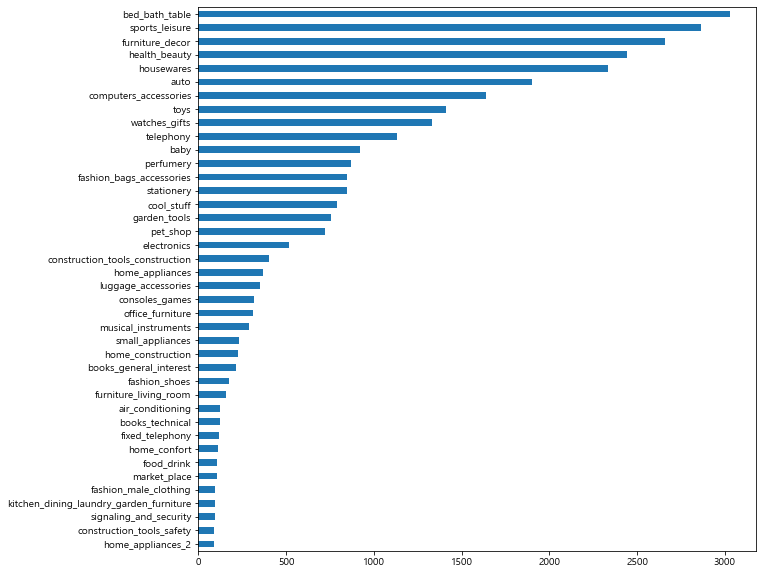

In [68]:
olist_product.product_category_name_english.value_counts().head(40).sort_values().plot.barh(figsize=(10,10))


<AxesSubplot:xlabel='count', ylabel='product_category_name_english'>

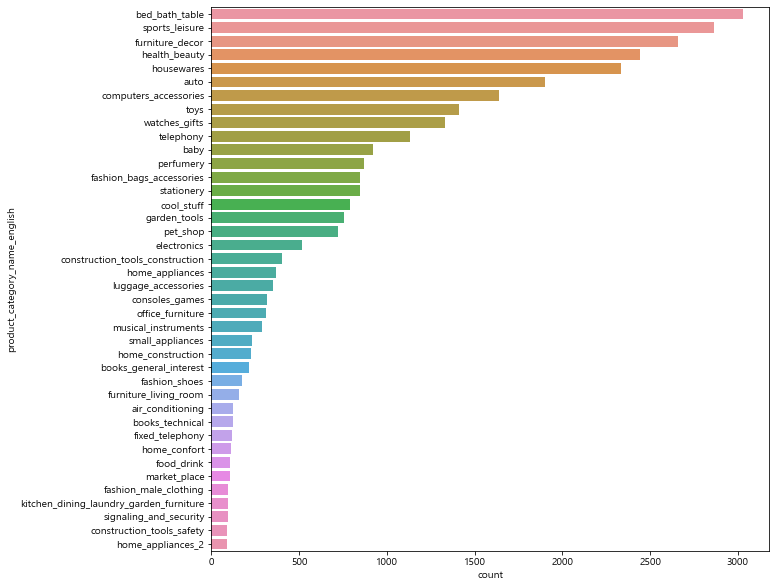

In [69]:
plt.figure(figsize=(10,10))
sns.countplot(data=olist_product,y='product_category_name_english', 
              order=olist_product.product_category_name_english.value_counts().head(40).index)

### category별 제품비율

In [70]:
prd_cnt=olist_product.product_category_name_english.value_counts().to_frame()
prd_cnt['ratio']=prd_cnt.product_category_name_english/32341*100
prd_cnt

,product_category_name_english,ratio
bed_bath_table,3029,9.365820
sports_leisure,2867,8.864908
furniture_decor,2657,8.215578
health_beauty,2444,7.556971
housewares,2335,7.219938
...,...,...
tablets_printing_image,9,0.027828
home_comfort_2,5,0.015460
fashion_childrens_clothes,5,0.015460
security_and_services,2,0.006184


In [71]:
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Sellers Dataset
This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

* seller_id : seller unique identifier
* seller_zip_code_prefix : first 5 digits of seller zip code
* seller_city : seller city name
* seller_state : seller state

### info

In [72]:
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [73]:
olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


* **<span style="color:red"> zipcode 타입 변환  </span>**

In [74]:
olist_sellers["seller_zip_code_prefix"]=olist_sellers["seller_zip_code_prefix"].apply(lambda x : str(x))


In [75]:
olist_sellers.describe(include=np.object)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,71592660bbcb6a4664e97b6f8b68babc,14940,sao paulo,SP
freq,1,49,694,1849


### state별 seller count 시각화

<AxesSubplot:>

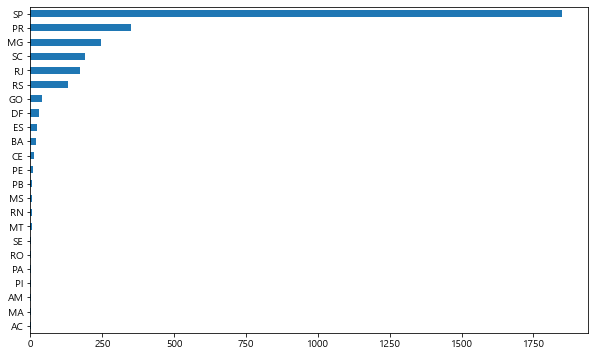

In [76]:
olist_sellers.seller_state.value_counts().sort_values().plot.barh(figsize=(10,6))


<AxesSubplot:>

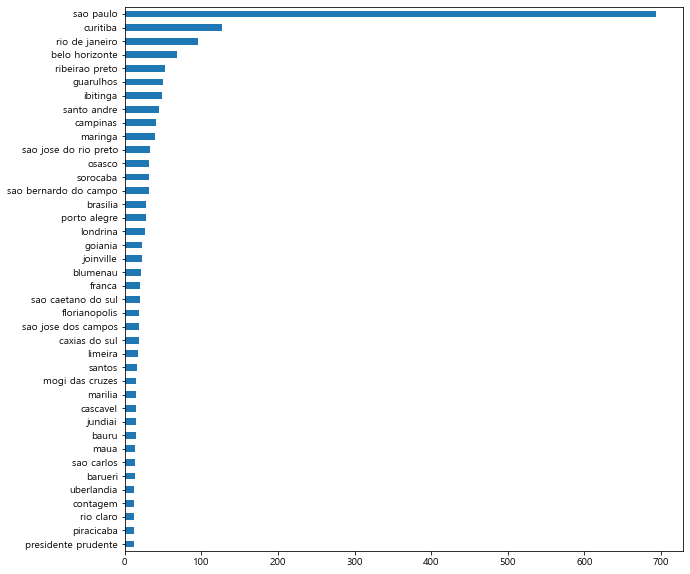

In [77]:
olist_sellers.seller_city.value_counts().head(40).sort_values().plot.barh(figsize=(10,10))

## Customers Dataset
This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.  
    
At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.
  
* customer_id : key to the orders dataset. Each order has a unique customer_id.
* customer_unique_id : unique identifier of a customer.
* customer_zip_code_prefix : first five digits of customer zip code
* customer_city: customer city name
* customer_state : customer state

In [78]:
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [79]:
olist_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [80]:
olist_customer.describe() 

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


* **<span style="color:red"> object로 바꿔야함. 전처리 필요  </span>**

In [81]:
olist_customer.describe(include=np.object)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,9362ea913384dd5e069a7d24a872a7a7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


## Geolocation Dataset

This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.

* geolocation_zip_code_prefix : first 5 digits of zip code
* geolocation_lat : latitude
* geolocation_lng : longitude
* geolocation_city : city name
* geolocation_state : state

In [82]:
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [83]:
olist_geolocation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


## Order Reviews Dataset
This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

* review_id : unique review identifier
* order_id : unique order identifier
* review_score : Note ranging from 1 to 5 given by the customer on a satisfaction survey.
* review_comment_title : Comment title from the review left by the customer, in Portuguese.
* review_comment_message : Comment message from the review left by the customer, in Portuguese.

In [84]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [85]:
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [86]:
olist_order_reviews.review_score =olist_order_reviews.review_score .apply(lambda x: str(x))
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  object
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [87]:
olist_order_reviews.describe()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000,11715,41753,100000,100000
unique,99173,99441,5,4600,36921,637,99010
top,39b4603793c1c7f5f36d809b4a218664,df56136b8031ecd28e200bb18e6ddb2e,5,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,57420,426,230,466,4


# EDA

## Customer_RFM

### 고객별 주문수, 주문금액 데이터셋

In [88]:
cs_ord_pym=ord_pym.merge(olist_customer.iloc[:,:2], how='left', on='customer_id')
cs_ord_pym.head()

,order_id,customer_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10,38.71,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07,141.46,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08,179.12,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11,72.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02,28.62,72632f0f9dd73dfee390c9b22eb56dd6


In [89]:

cs_ord_pym=cs_ord_pym.drop(columns='customer_id')
cs_ord_pym.head()

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10,38.71,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07,141.46,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08,179.12,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11,72.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02,28.62,72632f0f9dd73dfee390c9b22eb56dd6


In [90]:
cs_ord_pym[cs_ord_pym.order_status=='shipped'].sort_values('order_purchase_timestamp').tail(20)

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id
60895,7b9993b735d04c56ac0c688400deb500,shipped,2018-08-12 14:15:40,2018,8,6,14,2018-08,158.08,2934eddaa1eb7e92a038176dec91e73f
44562,723fdebe8280ea74fca298382c4d7ac7,shipped,2018-08-12 21:51:12,2018,8,6,21,2018-08,26.45,7bd0f588e7a945f2b1c376079556f871
26092,3a2b0d4a2b00020fddcc9d625553a114,shipped,2018-08-12 22:26:07,2018,8,6,22,2018-08,37.46,2a4a52239ae7cbfbcc3ea345cdc953e8
61833,ef13a698cf88c9e17ccca0261e0b9e7a,shipped,2018-08-13 15:53:04,2018,8,0,15,2018-08,188.89,5c322fba2f17b7a044345f2e45d2f6ab
47547,f2d45d510df2224a3cac856602af7486,shipped,2018-08-13 20:48:30,2018,8,0,20,2018-08,85.70,f52326b181b36e2a37b8a0419b4d7f54
46484,f79d2206d0301d47bc2a623636ea53d1,shipped,2018-08-13 22:19:59,2018,8,0,22,2018-08,105.29,083ca1aa470c280236380973a48f77c6
60510,b1c978cd633caac1ce86e36b61e8aeb3,shipped,2018-08-15 18:48:07,2018,8,2,18,2018-08,51.12,dc34bc2c2df6e185a1c967437f3b68b3
47717,f38a6dc0f541c9dff3f0c72009f2976d,shipped,2018-08-17 00:07:40,2018,8,4,0,2018-08,59.18,b8a871c20119098879d1138ab15f9de2
87589,5e6f7229aec06e67732033777ee84816,shipped,2018-08-17 11:55:11,2018,8,4,11,2018-08,195.57,f65bf2a31e41b9fbbc1c14056b762f08
10847,cbb8c3748ad61bcd4011720d8a58a3a0,shipped,2018-08-17 13:11:13,2018,8,4,13,2018-08,131.49,f309ce8ec5099fbffad31a343a143e28


<AxesSubplot:xlabel='review_score', ylabel='count'>

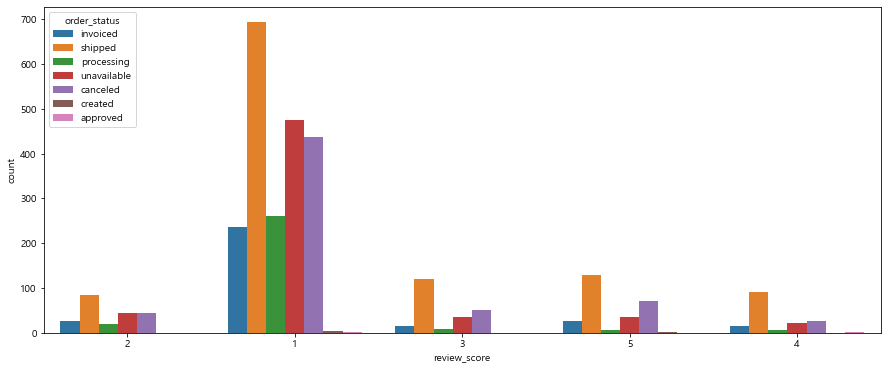

In [91]:
#리뷰
re=cs_ord_pym.merge(olist_order_reviews, how='inner', on = 'order_id')
temp = re[re.order_status !="delivered"][["order_status","review_score"]]
# re["review_score"]=re.review_score.astype(str)
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(data = temp, x = "review_score",hue = "order_status")

In [92]:
pd.set_option('display.max.colwidth', 20)
re[(re.order_status=='shipped') & (re.order_id=="7e61f390f3e0aa3b112e56091d2b9ee3")].review_comment_message.reset_index()

,index,review_comment_message
0,40077,Pedido foi cance...


### Frequency

In [93]:
# "canceled","unavailable"를 판매실적에서 제외 
# cs_ord_pym[(cs_ord_pym["order_status"]!="canceled") & (cs_ord_pym["order_status"]!="unavailable")]
c=["canceled","unavailable"]
cs_ord_pym_2=cs_ord_pym[~cs_ord_pym["order_status"].isin(c)]
cs_ord_pym_2

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id
0,e481f51cbdc54678...,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10,38.71,7c396fd4830fd042...
1,53cdb2fc8bc7dce0...,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07,141.46,af07308b275d755c...
2,47770eb9100c2d0c...,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08,179.12,3a653a41f6f9fc3d...
3,949d5b44dbf5de91...,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11,72.20,7c142cf63193a147...
4,ad21c59c0840e6cb...,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02,28.62,72632f0f9dd73dfe...
...,...,...,...,...,...,...,...,...,...,...
99435,9c5dedf39a927c1b...,delivered,2017-03-09 09:54:05,2017,3,3,9,2017-03,85.08,6359f309b166b019...
99436,63943bddc261676b...,delivered,2018-02-06 12:58:58,2018,2,1,12,2018-02,195.00,da62f9e57a76d978...
99437,83c1379a015df1e1...,delivered,2017-08-27 14:46:43,2017,8,6,14,2017-08,271.01,737520a9aad80b3f...
99438,11c177c8e97725db...,delivered,2018-01-08 21:28:27,2018,1,0,21,2018-01,441.16,5097a5312c8b157b...


In [94]:
cs_rfm=cs_ord_pym_2.groupby('customer_unique_id').order_id.count().reset_index()
cs_rfm.columns=["customer_unique_id","order_cnt"]
cs_rfm.describe()

,order_cnt
count,94989.000000
mean,1.033867
std,0.210828
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


<AxesSubplot:ylabel='order_cnt'>

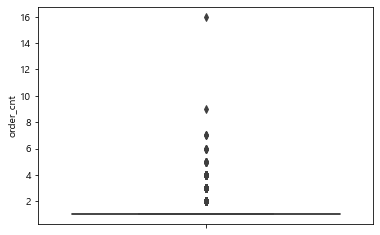

In [95]:
sns.boxplot(y='order_cnt', data=cs_rfm)

C:\Users\lhj90\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lhj90\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_cnt'>

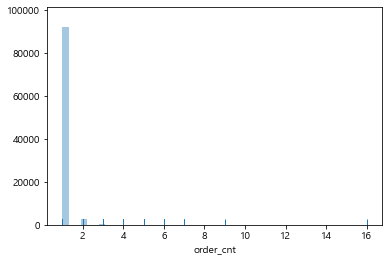

In [96]:
sns.distplot(cs_rfm['order_cnt'], kde=False, rug= True)

<AxesSubplot:xlabel='order_cnt', ylabel='count'>

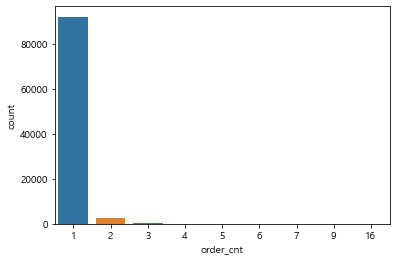

In [97]:
sns.countplot(x='order_cnt', data=cs_rfm)

In [98]:
cs_freq=cs_rfm.order_cnt.value_counts().reset_index().sort_values('index')
cs_freq["ratio"]=cs_freq.order_cnt/sum(cs_freq.order_cnt)*100
cs_freq

,index,order_cnt,ratio
0,1,92101,96.959648
1,2,2652,2.791902
2,3,188,0.197918
3,4,29,0.030530
4,5,9,0.009475
5,6,5,0.005264
6,7,3,0.003158
8,9,1,0.001053
7,16,1,0.001053


### Monetary

In [99]:
cs_rfm["total_amt"]=cs_ord_pym_2.groupby('customer_unique_id').payment_value.sum().reset_index().iloc[:,1:]
cs_rfm["avg_amt"]=cs_rfm["total_amt"]/cs_rfm["order_cnt"]
cs_rfm.head()

,customer_unique_id,order_cnt,total_amt,avg_amt
0,0000366f3b9a7992...,1,141.90,141.90
1,0000b849f77a49e4...,1,27.19,27.19
2,0000f46a3911fa3c...,1,86.22,86.22
3,0000f6ccb0745a6a...,1,43.62,43.62
4,0004aac84e0df4da...,1,196.89,196.89


In [100]:
cs_rfm.describe()

,order_cnt,total_amt,avg_amt
count,94989.000000,94989.000000,94989.000000
mean,1.033867,165.694312,160.752730
std,0.210828,226.740844,219.897722
min,1.000000,9.590000,9.590000
25%,1.000000,63.100000,62.440000
50%,1.000000,107.900000,105.740000
75%,1.000000,182.940000,176.990000
max,16.000000,13664.080000,13664.080000


C:\Users\lhj90\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amt', ylabel='Density'>

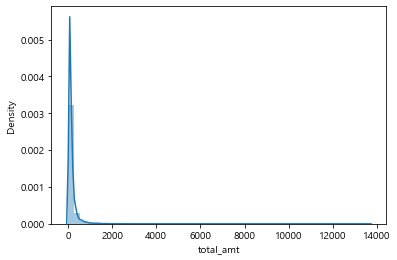

In [101]:
sns.distplot(cs_rfm["total_amt"])

<AxesSubplot:ylabel='total_amt'>

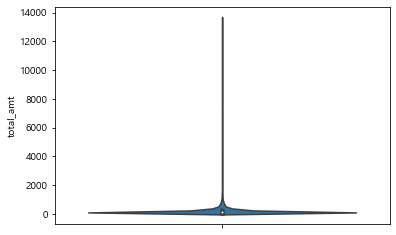

In [102]:
sns.violinplot(y="total_amt", data=cs_rfm)

In [103]:
cs_rfm["total_amt_ratio"]=cs_rfm["total_amt"]/sum(cs_rfm["total_amt"])*100
cs_rfm.sort_values(by="total_amt",ascending=False).head(10)
# 상위 10%는 총매출의 몇 %를 차지하지? 20%는? 

,customer_unique_id,order_cnt,total_amt,avg_amt,total_amt_ratio
3788,0a0a92112bd4c708...,1,13664.08,13664.0800,0.086816
81016,da122df9eeddfedc...,2,7571.63,3785.8150,0.048107
43943,763c8b1c9c68a022...,1,7274.88,7274.8800,0.046222
81855,dc4802a71eae9be1...,1,6929.31,6929.3100,0.044026
25904,459bef486812aa25...,1,6922.21,6922.2100,0.043981
94702,ff4159b92c40ebe4...,1,6726.66,6726.6600,0.042738
23844,4007669dec559734...,1,6081.54,6081.5400,0.038640
88656,eebb5dda148d3893...,1,4764.34,4764.3400,0.030271
27127,48e1ac109decbb87...,1,4681.78,4681.7800,0.029746
74406,c8460e4251689ba2...,4,4655.91,1163.9775,0.029582


## Seller_RFM

### ord_payment+고객id + 아이템(셀러,제품) set

In [158]:
# ord_payment + 고객 set 확인
cs_ord_pym.describe(include=np.object)

,order_id,order_status,Year_Month,customer_unique_id
count,99440,99440,99440,99440
unique,99440,8,25,96095
top,99902f632e0a578e...,delivered,2017-11,8d50f5eadf50201c...
freq,1,96477,7544,17


In [159]:
# 아이템 set 확인 
olist_order_items.describe(include=np.object)

,order_id,order_item_id,product_id,seller_id
count,112650,112650,112650,112650
unique,98666,21,32951,3095
top,8272b63d03f5f79c...,1,aca2eb7d00ea1a7b...,6560211a19b47992...
freq,21,98666,527,2033


In [160]:
# -> 아이템 set order > order set order 한 주문 안에 여러 상품과 seller가 포함되어있어 중복 행이 많이 발생함 유의

In [164]:
# left outer로 병합. 
item_ord_pym=cs_ord_pym.merge(olist_order_items, how='outer', on='order_id')
item_ord_pym.head()

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
0,e481f51cbdc54678...,delivered,2017-10-02 10:56:33,2017.0,10.0,0.0,10.0,2017-10,38.71,7c396fd4830fd042...,1,87285b3488457264...,3504c0cb71d7fa48...,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0...,delivered,2018-07-24 20:41:37,2018.0,7.0,1.0,20.0,2018-07,141.46,af07308b275d755c...,1,595fac2a385ac33a...,289cdb325fb7e7f8...,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c...,delivered,2018-08-08 08:38:49,2018.0,8.0,2.0,8.0,2018-08,179.12,3a653a41f6f9fc3d...,1,aa4383b373c6aca5...,4869f7a5dfa277a7...,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de91...,delivered,2017-11-18 19:28:06,2017.0,11.0,5.0,19.0,2017-11,72.20,7c142cf63193a147...,1,d0b61bfb1de832b1...,66922902710d126a...,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb...,delivered,2018-02-13 21:18:39,2018.0,2.0,1.0,21.0,2018-02,28.62,72632f0f9dd73dfe...,1,65266b2da20d04db...,2c9e548be18521d1...,2018-02-19 20:31:37,19.90,8.72,28.62


In [165]:
item_ord_pym.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  113425 non-null  object        
 1   order_status              113422 non-null  object        
 2   order_purchase_timestamp  113422 non-null  datetime64[ns]
 3   Year                      113422 non-null  float64       
 4   Month                     113422 non-null  float64       
 5   weekday                   113422 non-null  float64       
 6   hour                      113422 non-null  float64       
 7   Year_Month                113422 non-null  object        
 8   payment_value             113422 non-null  float64       
 9   customer_unique_id        113422 non-null  object        
 10  order_item_id             112650 non-null  object        
 11  product_id                112650 non-null  object        
 12  se

In [166]:
item_ord_pym.isnull().sum()

order_id                      0
order_status                  3
order_purchase_timestamp      3
Year                          3
Month                         3
weekday                       3
hour                          3
Year_Month                    3
payment_value                 3
customer_unique_id            3
order_item_id               775
product_id                  775
seller_id                   775
shipping_limit_date         775
price                       775
freight_value               775
total_product_value         775
dtype: int64

In [167]:
#payment정보 Null 확인
item_ord_pym[item_ord_pym.payment_value.isnull()]

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
113422,bfbd0f9bdef84302...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5a6b04657a4c5ee3...,ecccfa2bb93b34a3...,2016-09-19 23:11:33,44.99,2.83,47.82
113423,bfbd0f9bdef84302...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5a6b04657a4c5ee3...,ecccfa2bb93b34a3...,2016-09-19 23:11:33,44.99,2.83,47.82
113424,bfbd0f9bdef84302...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5a6b04657a4c5ee3...,ecccfa2bb93b34a3...,2016-09-19 23:11:33,44.99,2.83,47.82


In [168]:
#item정보 Null 확인
item_ord_pym[item_ord_pym.order_item_id.isnull()]

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
306,8e24261a7e58791d...,unavailable,2017-11-16 15:09:28,2017.0,11.0,3.0,15.0,2017-11,84.00,41fc647b8c6bd979...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
671,c272bcd21c287498...,unavailable,2018-01-31 11:31:37,2018.0,1.0,2.0,11.0,2018-01,97.68,0e634b16e4c585ac...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
791,37553832a3a89c9b...,unavailable,2017-08-14 17:38:02,2017.0,8.0,0.0,17.0,2017-08,132.46,596ed6d7a35890b3...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
850,d57e15fb07fd180f...,unavailable,2018-01-08 19:39:03,2018.0,1.0,0.0,19.0,2018-01,134.38,2349bbb558908e09...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1294,00b1cb0320190ca0...,canceled,2018-08-28 15:26:39,2018.0,8.0,1.0,15.0,2018-08,0.00,4fa4365000c7090f...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113201,aaab15da689073f8...,unavailable,2018-01-16 14:27:59,2018.0,1.0,1.0,14.0,2018-01,210.09,a33e0969408919ba...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
113233,3a3cddda5a7c2785...,canceled,2018-08-31 16:13:44,2018.0,8.0,4.0,16.0,2018-08,63.89,e90598185d2427a3...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
113321,a89abace0dcc01ee...,canceled,2018-09-06 18:45:47,2018.0,9.0,3.0,18.0,2018-09,107.13,d05c44a138277ad3...,NaN,NaN,NaN,NaT,NaN,NaN,NaN
113322,a69ba794cc7deb41...,unavailable,2017-08-23 16:28:04,2017.0,8.0,2.0,16.0,2017-08,195.91,e72a90a2b29fe1a8...,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [112]:
#order status별 item_null값 갯수
item_ord_pym[item_ord_pym.order_item_id.isnull()].order_status.value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

In [113]:
#payment set 에서의 orderstatus와 비교 
cs_ord_pym.order_status.value_counts()

delivered      96477
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [114]:
# inner로 병합. 
item_ord_pym=cs_ord_pym.merge(olist_order_items, how='inner', on='order_id')
item_ord_pym.head()

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
0,e481f51cbdc54678...,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10,38.71,7c396fd4830fd042...,1,87285b3488457264...,3504c0cb71d7fa48...,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0...,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07,141.46,af07308b275d755c...,1,595fac2a385ac33a...,289cdb325fb7e7f8...,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c...,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08,179.12,3a653a41f6f9fc3d...,1,aa4383b373c6aca5...,4869f7a5dfa277a7...,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de91...,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11,72.20,7c142cf63193a147...,1,d0b61bfb1de832b1...,66922902710d126a...,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb...,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02,28.62,72632f0f9dd73dfe...,1,65266b2da20d04db...,2c9e548be18521d1...,2018-02-19 20:31:37,19.90,8.72,28.62


In [115]:
#2016년, 2018-09월 제거
item_ord_pym=item_ord_pym[~(item_ord_pym["Year_Month"]<"2017-01")& (item_ord_pym["Year_Month"]<"2018-09")]

### order 별 payment value vs sum(total_price_value) 

In [116]:
c=item_ord_pym.groupby("order_id").agg({"payment_value" : 'mean', "total_product_value" : 'sum'})
c.describe()

,payment_value,total_product_value
count,98353.000000,98353.000000
mean,160.533974,160.505562
std,220.522374,220.506274
min,9.590000,9.590000
25%,61.990000,61.960000
50%,105.280000,105.280000
75%,176.830000,176.810000
max,13664.080000,13664.080000


In [117]:
# 다른 값 분포 확인 : 98665중 258개만 합이 다름. 거의 같다고 가정해도 무방. 
d=c[c.payment_value.round()!=c.total_product_value.round()].copy()
d["diff"]=abs(d.payment_value-d.total_product_value)
d.describe()

,payment_value,total_product_value,diff
count,253.000000,253.000000,253.000000
mean,124.553439,113.511542,12.094783
std,139.456184,125.520883,16.855820
min,16.380000,17.380000,0.010000
25%,53.380000,49.330000,3.630000
50%,80.900000,73.430000,7.160000
75%,141.650000,125.290000,14.540000
max,1586.470000,1403.660000,182.810000


In [118]:
d[d["diff"] > 180]

,payment_value,total_product_value,diff
order_id,,,
ce6d150fb29ada17d2082f4847107665,1586.47,1403.66,182.81


In [119]:
item_ord_pym[item_ord_pym["order_id"]=='ce6d150fb29ada17d2082f4847107665']

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
13268,ce6d150fb29ada17...,delivered,2018-01-25 11:17:02,2018,1,3,11,2018-01,1586.47,3629a4b18f2eb69e...,1,638bbb2a5e4f360b...,c4af86330efa7a26...,2018-02-07 12:31:37,1299.0,104.66,1403.66


In [120]:
olist_order_payments[olist_order_payments["order_id"]=='ce6d150fb29ada17d2082f4847107665']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
359,ce6d150fb29ada17...,1,credit_card,10,1586.47


**Seller매출 집계시에는 total_pruduct_value로 보는 것이 적절하다고 판단됨**

### order별 중복 seller 수 

In [121]:
s=item_ord_pym.groupby(["order_id"]).agg({"seller_id" : 'nunique'})
s[s["seller_id"]>1]

,seller_id
order_id,
002f98c0f7efd42638ed6100ca699b42,2
00bcee890eba57a9767c7b5ca12d3a1b,2
01144cadcf64b6427f0a6580a3033220,2
013a98b3a668bcef05b98898177f6923,2
014405982914c2cde2796ddcf0b8703d,2
...,...
feded510efe2a76dd134d8533af626f9,2
feea1134dca132388da564d8f026a2ca,2
ff00a56fe9475a175cd651d77c707a09,2


In [122]:
#order내 비중
round(len(s[s["seller_id"]>1])/item_ord_pym["order_id"].nunique()*100,3)

1.295

### Frequency

In [123]:
# "canceled","unavailable"를 판매실적에서 제외 
# cs_ord_pym[(cs_ord_pym["order_status"]!="canceled") & (cs_ord_pym["order_status"]!="unavailable")]
c=["canceled","unavailable"]
item_ord_pym_2=item_ord_pym[~item_ord_pym["order_status"].isin(c)]
item_ord_pym_2

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
0,e481f51cbdc54678...,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10,38.71,7c396fd4830fd042...,1,87285b3488457264...,3504c0cb71d7fa48...,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0...,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07,141.46,af07308b275d755c...,1,595fac2a385ac33a...,289cdb325fb7e7f8...,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c...,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08,179.12,3a653a41f6f9fc3d...,1,aa4383b373c6aca5...,4869f7a5dfa277a7...,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de91...,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11,72.20,7c142cf63193a147...,1,d0b61bfb1de832b1...,66922902710d126a...,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb...,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02,28.62,72632f0f9dd73dfe...,1,65266b2da20d04db...,2c9e548be18521d1...,2018-02-19 20:31:37,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112642,63943bddc261676b...,delivered,2018-02-06 12:58:58,2018,2,1,12,2018-02,195.00,da62f9e57a76d978...,1,f1d4ce8c6dd66c47...,1f9ab4708f3056ed...,2018-02-12 13:10:37,174.90,20.10,195.00
112643,83c1379a015df1e1...,delivered,2017-08-27 14:46:43,2017,8,6,14,2017-08,271.01,737520a9aad80b3f...,1,b80910977a37536a...,d50d79cb34e38265...,2017-09-05 15:04:16,205.99,65.02,271.01
112644,11c177c8e97725db...,delivered,2018-01-08 21:28:27,2018,1,0,21,2018-01,441.16,5097a5312c8b157b...,1,d1c427060a0f73f6...,a1043bafd471dff5...,2018-01-12 21:36:21,179.99,40.59,220.58
112645,11c177c8e97725db...,delivered,2018-01-08 21:28:27,2018,1,0,21,2018-01,441.16,5097a5312c8b157b...,2,d1c427060a0f73f6...,a1043bafd471dff5...,2018-01-12 21:36:21,179.99,40.59,220.58


In [124]:
# seller별 order count
sel_rfm=item_ord_pym_2.groupby("seller_id")["order_id"].count().reset_index()
sel_rfm.head()

,seller_id,order_id
0,0015a82c2db000af...,3
1,001cca7ae9ae17fb...,239
2,002100f778ceb843...,55
3,003554e2dce176b5...,1
4,004c9cd9d87a3c30...,170


#### 셀러별 판매건수 분포

In [125]:
sel_rfm.columns=["seller_id","order_cnt"]
sel_rfm.describe()

,order_cnt
count,3029.000000
mean,36.894024
std,119.989826
min,1.000000
25%,2.000000
50%,8.000000
75%,25.000000
max,2025.000000


C:\Users\lhj90\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lhj90\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_cnt', ylabel='Density'>

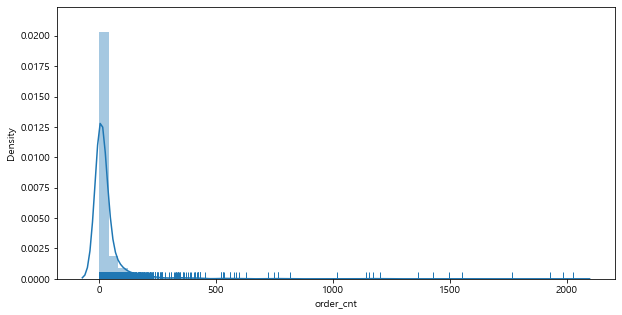

In [126]:
plt.figure(figsize=(10,5))
sns.distplot(sel_rfm['order_cnt'], kde=True, rug= True)

**seller별 누적 판매 건수는 median 8건이며, 굉장히 왼쪽으로 치우쳐있다.**

#### 셀러 판매건수 파레토 차트 


In [127]:
sel_pareto=sel_rfm.sort_values(by='order_cnt',ascending=False).reset_index().iloc[:,1:3]
sel_pareto["p"]=1/sel_pareto["seller_id"].count()
sel_pareto["P"]=sel_pareto["p"].cumsum()*100
sel_pareto["cnt_rate"]=sel_pareto["order_cnt"]/sel_pareto["order_cnt"].sum()
sel_pareto["cnt_pareto"]=sel_pareto["cnt_rate"].cumsum()*100
sel_pareto

,seller_id,order_cnt,p,P,cnt_rate,cnt_pareto
0,6560211a19b47992...,2025,0.00033,0.033014,0.018120,1.812048
1,4a3ca9315b744ce9...,1985,0.00033,0.066028,0.017763,3.588303
2,1f50f920176fa81d...,1930,0.00033,0.099043,0.017270,5.315341
3,cc419e0650a3c5ba...,1766,0.00033,0.132057,0.015803,6.895626
4,da8622b14eb17ae2...,1551,0.00033,0.165071,0.013879,8.283521
...,...,...,...,...,...,...
3024,9c3a1c416c765687...,1,0.00033,99.867943,0.000009,99.996421
3025,9c351405b754cc5c...,1,0.00033,99.900957,0.000009,99.997315
3026,3986c0b54f6b748b...,1,0.00033,99.933972,0.000009,99.998210
3027,9bf11dfc0bec77e5...,1,0.00033,99.966986,0.000009,99.999105


In [128]:
sel_pareto.drop(columns=["p","cnt_rate"], inplace=True)
sel_pareto

,seller_id,order_cnt,P,cnt_pareto
0,6560211a19b47992...,2025,0.033014,1.812048
1,4a3ca9315b744ce9...,1985,0.066028,3.588303
2,1f50f920176fa81d...,1930,0.099043,5.315341
3,cc419e0650a3c5ba...,1766,0.132057,6.895626
4,da8622b14eb17ae2...,1551,0.165071,8.283521
...,...,...,...,...
3024,9c3a1c416c765687...,1,99.867943,99.996421
3025,9c351405b754cc5c...,1,99.900957,99.997315
3026,3986c0b54f6b748b...,1,99.933972,99.998210
3027,9bf11dfc0bec77e5...,1,99.966986,99.999105


##### 표

In [129]:
sel_pareto.rename(columns={"P":"누적고객비율", "cnt_pareto" : "누적건수비율"}, inplace = True)
sel_pareto

,seller_id,order_cnt,누적고객비율,누적건수비율
0,6560211a19b47992...,2025,0.033014,1.812048
1,4a3ca9315b744ce9...,1985,0.066028,3.588303
2,1f50f920176fa81d...,1930,0.099043,5.315341
3,cc419e0650a3c5ba...,1766,0.132057,6.895626
4,da8622b14eb17ae2...,1551,0.165071,8.283521
...,...,...,...,...
3024,9c3a1c416c765687...,1,99.867943,99.996421
3025,9c351405b754cc5c...,1,99.900957,99.997315
3026,3986c0b54f6b748b...,1,99.933972,99.998210
3027,9bf11dfc0bec77e5...,1,99.966986,99.999105


##### 그래프

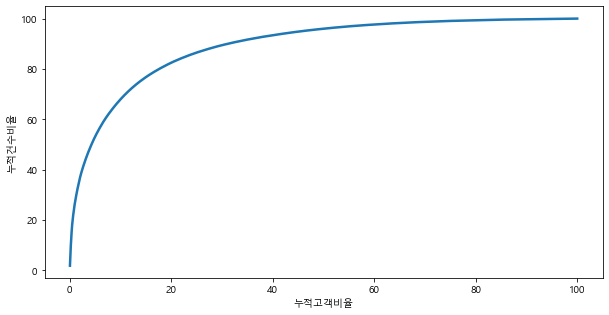

In [130]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=sel_pareto, x="누적고객비율", y="누적건수비율", palette="tab10", linewidth=2.5)


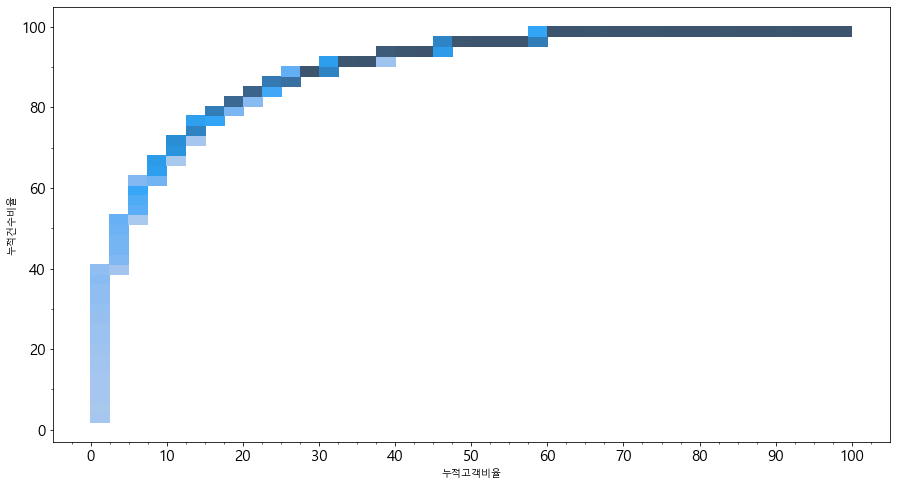

In [131]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,8))
ax=sns.histplot(data=sel_pareto, x="누적고객비율", y="누적건수비율", bins=40)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)


### Monetary

In [132]:
sel_rfm["total_amt"]=item_ord_pym_2.groupby("seller_id")["total_product_value"].sum().reset_index().iloc[:,-1]
sel_rfm["avg_amt"]=sel_rfm["total_amt"]/sel_rfm["order_cnt"]
sel_rfm.head()

,seller_id,order_cnt,total_amt,avg_amt
0,0015a82c2db000af...,3,2748.06,916.020000
1,001cca7ae9ae17fb...,239,33934.17,141.983975
2,002100f778ceb843...,55,2028.16,36.875636
3,003554e2dce176b5...,1,139.38,139.380000
4,004c9cd9d87a3c30...,170,23263.94,136.846706


#### 셀러별 매출총액 분포

In [133]:
sel_rfm.describe()

,order_cnt,total_amt,avg_amt
count,3029.000000,3029.000000,3029.000000
mean,36.894024,5177.849700,200.496903
std,119.989826,15999.631154,335.207583
min,1.000000,12.220000,12.220000
25%,2.000000,280.910000,69.960000
50%,8.000000,1014.950000,115.225000
75%,25.000000,4059.730000,201.215000
max,2025.000000,249393.440000,6922.210000


C:\Users\lhj90\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amt', ylabel='Density'>

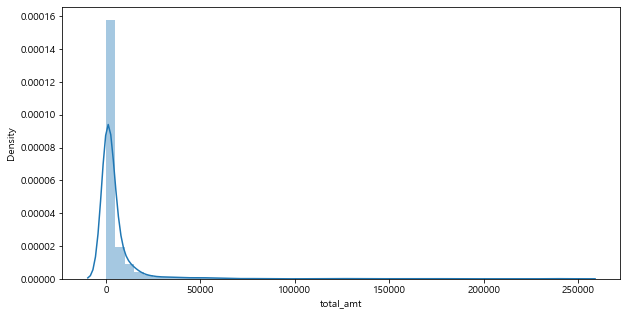

In [134]:
plt.figure(figsize=(10,5))
sns.distplot(sel_rfm['total_amt'])

((array([-3.50440921, -3.26084847, -3.12616887, ...,  3.12616887,
          3.26084847,  3.50440921]),
  array([1.2220000e+01, 1.5220000e+01, 1.5900000e+01, ..., 2.3585668e+05,
         2.3953644e+05, 2.4939344e+05])),
 (8666.142150152189, 5177.849699570816, 0.5411703439509585))

C:\Users\lhj90\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lhj90\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


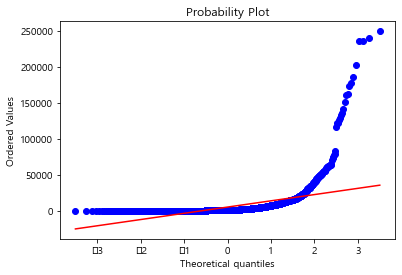

In [135]:
import scipy.stats as stats

stats.probplot(sel_rfm['total_amt'], plot=plt)

#### 셀러 매출 파레토 차트

In [136]:
sel_pareto=sel_rfm.sort_values(by='total_amt',ascending=False).reset_index().iloc[:,1:4]
sel_pareto["p"]=1/sel_pareto["seller_id"].count()
sel_pareto["P"]=sel_pareto["p"].cumsum()*100
sel_pareto["amt_rate"]=sel_pareto["total_amt"]/sel_pareto["total_amt"].sum()
sel_pareto["amt_pareto"]=sel_pareto["amt_rate"].cumsum()*100
sel_pareto

,seller_id,order_cnt,total_amt,p,P,amt_rate,amt_pareto
0,4869f7a5dfa277a7...,1155,249393.44,0.00033,0.033014,1.590143e-02,1.590143
1,7c67e1448b00f6e9...,1364,239536.44,0.00033,0.066028,1.527295e-02,3.117438
2,53243585a1d6dc26...,410,235856.68,0.00033,0.099043,1.503833e-02,4.621271
3,4a3ca9315b744ce9...,1985,235359.30,0.00033,0.132057,1.500661e-02,6.121932
4,fa1c13f2614d7b5c...,585,202861.67,0.00033,0.165071,1.293455e-02,7.415387
...,...,...,...,...,...,...,...
3024,702835e4b785b67a...,1,18.56,0.00033,99.867943,1.183394e-06,99.999619
3025,4965a7002cca7730...,1,16.36,0.00033,99.900957,1.043121e-06,99.999724
3026,1fa2d3def6adfa70...,1,15.90,0.00033,99.933972,1.013791e-06,99.999825
3027,77128dec4bec4878...,1,15.22,0.00033,99.966986,9.704339e-07,99.999922


In [137]:
sel_pareto.drop(columns=["p","amt_rate"], inplace=True)
sel_pareto

,seller_id,order_cnt,total_amt,P,amt_pareto
0,4869f7a5dfa277a7...,1155,249393.44,0.033014,1.590143
1,7c67e1448b00f6e9...,1364,239536.44,0.066028,3.117438
2,53243585a1d6dc26...,410,235856.68,0.099043,4.621271
3,4a3ca9315b744ce9...,1985,235359.30,0.132057,6.121932
4,fa1c13f2614d7b5c...,585,202861.67,0.165071,7.415387
...,...,...,...,...,...
3024,702835e4b785b67a...,1,18.56,99.867943,99.999619
3025,4965a7002cca7730...,1,16.36,99.900957,99.999724
3026,1fa2d3def6adfa70...,1,15.90,99.933972,99.999825
3027,77128dec4bec4878...,1,15.22,99.966986,99.999922


##### 표

In [138]:
sel_pareto.rename(columns={"P":"누적고객비율", "amt_pareto" : "누적매출비율"}, inplace = True)
sel_pareto

,seller_id,order_cnt,total_amt,누적고객비율,누적매출비율
0,4869f7a5dfa277a7...,1155,249393.44,0.033014,1.590143
1,7c67e1448b00f6e9...,1364,239536.44,0.066028,3.117438
2,53243585a1d6dc26...,410,235856.68,0.099043,4.621271
3,4a3ca9315b744ce9...,1985,235359.30,0.132057,6.121932
4,fa1c13f2614d7b5c...,585,202861.67,0.165071,7.415387
...,...,...,...,...,...
3024,702835e4b785b67a...,1,18.56,99.867943,99.999619
3025,4965a7002cca7730...,1,16.36,99.900957,99.999724
3026,1fa2d3def6adfa70...,1,15.90,99.933972,99.999825
3027,77128dec4bec4878...,1,15.22,99.966986,99.999922


##### 그래프

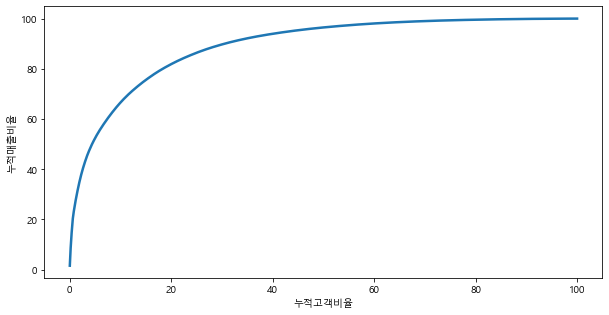

In [139]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=sel_pareto, x="누적고객비율", y="누적매출비율", palette="tab10", linewidth=2.5)


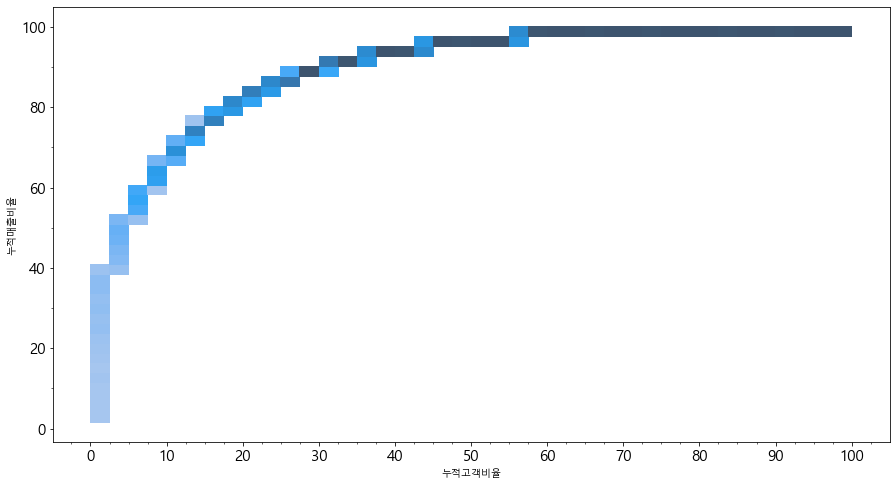

In [140]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,8))
ax=sns.histplot(data=sel_pareto, x="누적고객비율", y="누적매출비율", bins=40)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)


##### 비율 별 값 검색

In [280]:
sel_pareto[sel_pareto["누적고객비율"].round()==20]
# sel_pareto[sel_pareto["누적매출비율"].round()==80]

,seller_id,order_cnt,total_amt,누적고객비율,누적매출비율
590,2a7dc43cecabf234...,54,5629.62,19.511390,81.330764
591,ad420dd0c4f92f8a...,46,5618.40,19.544404,81.366587
592,d20b021d3efdf267...,105,5617.37,19.577418,81.402404
593,11bfa66332777660...,102,5608.54,19.610432,81.438164
594,e0878efa0e0b7e53...,29,5594.91,19.643447,81.473838
595,a3f0b55de5033873...,26,5577.74,19.676461,81.509402
596,cc5a78bbad32776d...,38,5573.35,19.709475,81.544937
597,ef990a83bbea832f...,44,5557.24,19.742489,81.580371
598,822166ed1e47908f...,108,5535.95,19.775503,81.615668
599,a4b6b9b992b46e9e...,8,5502.84,19.808518,81.650754


## Seller_Monthly_RFM


In [142]:
item_ord_pym_2

,order_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,Year_Month,payment_value,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_product_value
0,e481f51cbdc54678...,delivered,2017-10-02 10:56:33,2017,10,0,10,2017-10,38.71,7c396fd4830fd042...,1,87285b3488457264...,3504c0cb71d7fa48...,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0...,delivered,2018-07-24 20:41:37,2018,7,1,20,2018-07,141.46,af07308b275d755c...,1,595fac2a385ac33a...,289cdb325fb7e7f8...,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c...,delivered,2018-08-08 08:38:49,2018,8,2,8,2018-08,179.12,3a653a41f6f9fc3d...,1,aa4383b373c6aca5...,4869f7a5dfa277a7...,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de91...,delivered,2017-11-18 19:28:06,2017,11,5,19,2017-11,72.20,7c142cf63193a147...,1,d0b61bfb1de832b1...,66922902710d126a...,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb...,delivered,2018-02-13 21:18:39,2018,2,1,21,2018-02,28.62,72632f0f9dd73dfe...,1,65266b2da20d04db...,2c9e548be18521d1...,2018-02-19 20:31:37,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112642,63943bddc261676b...,delivered,2018-02-06 12:58:58,2018,2,1,12,2018-02,195.00,da62f9e57a76d978...,1,f1d4ce8c6dd66c47...,1f9ab4708f3056ed...,2018-02-12 13:10:37,174.90,20.10,195.00
112643,83c1379a015df1e1...,delivered,2017-08-27 14:46:43,2017,8,6,14,2017-08,271.01,737520a9aad80b3f...,1,b80910977a37536a...,d50d79cb34e38265...,2017-09-05 15:04:16,205.99,65.02,271.01
112644,11c177c8e97725db...,delivered,2018-01-08 21:28:27,2018,1,0,21,2018-01,441.16,5097a5312c8b157b...,1,d1c427060a0f73f6...,a1043bafd471dff5...,2018-01-12 21:36:21,179.99,40.59,220.58
112645,11c177c8e97725db...,delivered,2018-01-08 21:28:27,2018,1,0,21,2018-01,441.16,5097a5312c8b157b...,2,d1c427060a0f73f6...,a1043bafd471dff5...,2018-01-12 21:36:21,179.99,40.59,220.58


In [143]:
Monlty_sales=item_ord_pym_2.iloc[:,[0,7,9,11,12,16]]
Monlty_sales

,order_id,Year_Month,customer_unique_id,product_id,seller_id,total_product_value
0,e481f51cbdc54678...,2017-10,7c396fd4830fd042...,87285b3488457264...,3504c0cb71d7fa48...,38.71
1,53cdb2fc8bc7dce0...,2018-07,af07308b275d755c...,595fac2a385ac33a...,289cdb325fb7e7f8...,141.46
2,47770eb9100c2d0c...,2018-08,3a653a41f6f9fc3d...,aa4383b373c6aca5...,4869f7a5dfa277a7...,179.12
3,949d5b44dbf5de91...,2017-11,7c142cf63193a147...,d0b61bfb1de832b1...,66922902710d126a...,72.20
4,ad21c59c0840e6cb...,2018-02,72632f0f9dd73dfe...,65266b2da20d04db...,2c9e548be18521d1...,28.62
...,...,...,...,...,...,...
112642,63943bddc261676b...,2018-02,da62f9e57a76d978...,f1d4ce8c6dd66c47...,1f9ab4708f3056ed...,195.00
112643,83c1379a015df1e1...,2017-08,737520a9aad80b3f...,b80910977a37536a...,d50d79cb34e38265...,271.01
112644,11c177c8e97725db...,2018-01,5097a5312c8b157b...,d1c427060a0f73f6...,a1043bafd471dff5...,220.58
112645,11c177c8e97725db...,2018-01,5097a5312c8b157b...,d1c427060a0f73f6...,a1043bafd471dff5...,220.58


#### Seller별 Monthly Set

In [144]:
sel_Msales=item_ord_pym_2.iloc[:,[0,7,9,11,12,16]]
sel_Msales=sel_Msales.groupby(["Year_Month","seller_id"]).agg(
                                    {"order_id" : "nunique", "customer_unique_id" : "nunique", 
                                     "product_id" : "count", "total_product_value" : "sum" }).reset_index(
                        ).rename(columns={"order_id":"ord_cnt","customer_unique_id":"cs_cnt","product_id":"item_cnt",
                                          "total_product_value":"sales"})
sel_Msales

,Year_Month,seller_id,ord_cnt,cs_cnt,item_cnt,sales
0,2017-01,004c9cd9d87a3c30...,6,6,6,830.37
1,2017-01,014c0679dd340a0e...,1,1,1,128.20
2,2017-01,01cf7e3d21494c41...,6,6,6,1093.38
3,2017-01,054694fa03fe82ce...,6,6,7,2594.42
4,2017-01,05ff92fedb5be479...,3,3,4,1418.79
...,...,...,...,...,...,...
16166,2018-08,ff1fb4c404b2efe6...,7,7,7,1401.58
16167,2018-08,ffa6adafb71b807d...,4,4,4,617.59
16168,2018-08,ffc470761de7d023...,6,6,6,436.01
16169,2018-08,ffdd9f82b9a447f6...,1,1,1,111.79


### seller별 Monthly Sales 

#### 월별 Seller 매출 분포도

<AxesSubplot:xlabel='Year_Month', ylabel='sales'>

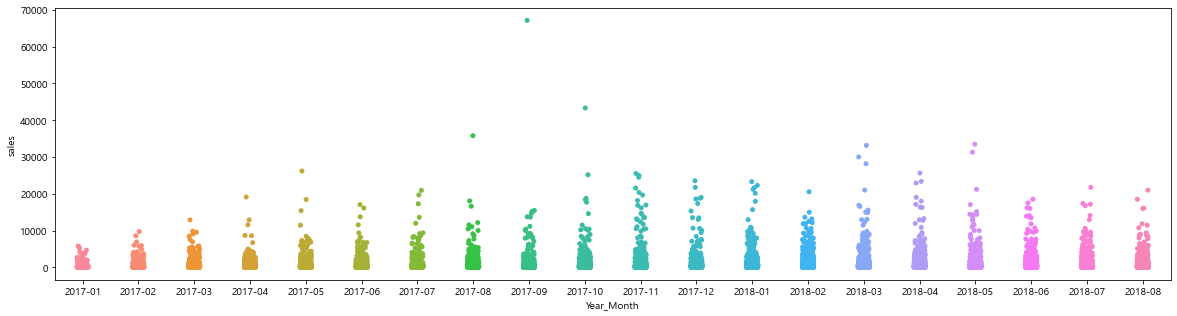

In [145]:
plt.figure(figsize=(20,5))
sns.stripplot(data=sel_Msales, x='Year_Month', y='sales')

In [146]:
Msales_desc=pd.DataFrame(data=np.NaN, 
                         columns=sel_Msales[sel_Msales.Year_Month=='2017-01']["sales"].describe().index.to_list(),
                         index=sel_Msales['Year_Month'].value_counts().sort_index().index.to_list())
Msales_desc

,count,mean,std,min,25%,50%,75%,max
2017-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
Mrange=sel_Msales['Year_Month'].value_counts().sort_index().index.to_list()

#### 월별 seller 매출 descript 표 

In [148]:
for m in Mrange:
    Msales_desc.loc[m]= sel_Msales[sel_Msales.Year_Month==m]["sales"].describe().to_list()

Msales_desc    

,count,mean,std,min,25%,50%,75%,max
2017-01,226.0,605.944513,970.306443,22.72,112.3500,255.790,612.8850,5823.72
2017-02,425.0,667.203976,1102.982312,18.56,126.0400,266.960,693.9100,9763.28
2017-03,490.0,868.608082,1445.289846,14.62,125.1675,330.555,1011.1350,12937.87
2017-04,503.0,806.856083,1514.233636,20.67,128.3850,300.000,935.8400,19136.74
2017-05,577.0,1009.897452,1963.435930,12.22,153.8400,373.130,1105.2000,26209.07
2017-06,534.0,935.678352,1782.751295,12.89,137.6675,348.070,915.2800,17067.84
2017-07,602.0,961.384934,1978.335616,19.74,147.4525,368.195,933.6600,20946.96
2017-08,700.0,945.576457,2138.779952,12.95,157.1125,387.325,885.0750,35787.67
2017-09,726.0,987.744793,3036.626744,10.07,142.7275,340.365,844.9550,67113.00
2017-10,773.0,989.335097,2526.243022,11.63,155.7200,388.170,915.7000,43332.35


In [200]:
q= sel_Msales[sel_Msales.Year_Month=='2017-01']["sales"].quantile(0.8)
q

783.0000000000002

In [201]:
sel_Msales[sel_Msales.Year_Month=='2017-01']["sales"][sel_Msales[sel_Msales.Year_Month=='2017-01'][
    "sales"]>q].count()/sel_Msales[sel_Msales.Year_Month=='2017-01']["sales"].count()

0.19911504424778761

In [270]:
Msales_pareto=pd.DataFrame(data=np.NaN, 
                         columns=["상위 N% 매출", "매출 비중"],
                         index=sel_Msales['Year_Month'].value_counts().sort_index().index.to_list())
Msales_pareto

,상위 N% 매출,매출 비중
2017-01,NaN,NaN
2017-02,NaN,NaN
2017-03,NaN,NaN
2017-04,NaN,NaN
2017-05,NaN,NaN
2017-06,NaN,NaN
2017-07,NaN,NaN
2017-08,NaN,NaN
2017-09,NaN,NaN
2017-10,NaN,NaN


#### 월별 셀러 매출 파레토 ( 상위 N% 매출 비중 값)

In [285]:
# 총액으로 했을때는, 상위 20%가 전체 매출의80%였는데, 월별로 나누면 30%가 약 80%를 차지한다. 
N=2
for m in Mrange:
    Msales_pareto.loc[m,"상위 N% 매출"] = sel_Msales[sel_Msales.Year_Month==m]["sales"].quantile(1-N/100)
    Msales_pareto.loc[m,"매출 비중"] = sel_Msales[sel_Msales.Year_Month==m]["sales"][
        sel_Msales[sel_Msales.Year_Month==m]["sales"]>Msales_pareto.loc[m,"상위 N% 매출"]
        ].sum()/sel_Msales[sel_Msales.Year_Month==m]["sales"].sum() *100
Msales_pareto.rename(columns={"상위 N% 매출":'상위 '+str(N)+'% 매출'})

,상위 2% 매출,매출 비중
2017-01,3986.3450,18.636005
2017-02,4070.0920,19.888032
2017-03,5386.8022,19.188375
2017-04,4309.9236,22.327027
2017-05,6774.9384,22.415660
2017-06,6636.9420,22.442141
2017-07,7012.1300,25.932514
2017-08,6043.7718,25.915581
2017-09,7981.2450,31.167010
2017-10,7603.2368,30.401875
